In [1]:
from util.de_utils import *
from util.class_def.de_obj_classes import *
from util.plot_utils import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

# Load data
* RNAseq data with TMM normalization
* Metadata
* DE data
    * PE specific changes over time in preg

In [2]:
path_prefix = "../../data/rnaseq_stanford_all/discovery/"
all_data = rnaseq_and_meta_data(path_prefix + "sample_meta_postQC.csv", 
                                 path_prefix + "w_mild_severe/logCPM_postQC_RemovedBatch.csv", 
                                 path_prefix + "TMM_postQC.csv",
                                is_logCPM_path_R = True,
                                counts_index_cols = [0],
                                mygene_db = mygene.MyGeneInfo())

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-7160...done.
Finished.
15 input query terms found no hit:
	['ENSG00000116957', 'ENSG00000130723', 'ENSG00000133808', 'ENSG00000150076', 'ENSG00000155640', 'ENS
querying 1-15...done.
Finished.
8 input query terms found no hit:
	['AL356053.1', 'none', 'AC098614.2', 'CTB-133G6.1', 'none', 'RP11-367G6.3', 'none', 'none']


In [3]:
#Find changes in common between mild and severe PE [proxy for multifactorial nature of PE]
de_PE_mild = de_data("out/de/w_mild_severe/DE_PEspecific_GA_PP_mild_changes_timeToPE_w_covar_bmi_fsex_w_batch.csv", 
                     alpha = 0.05, de_type = 'PE preg changes', to_round = False)
de_PE_severe = de_data("out/de/w_mild_severe/DE_PEspecific_GA_PP_severe_changes_timeToPE_w_covar_bmi_fsex_w_batch.csv", 
                       alpha = 0.05, de_type = 'PE preg changes', to_round = False)
de_PE_sig_genes = de_PE_mild.sig_genes.intersection(de_PE_severe.sig_genes)

print('%d DEGs detected' % de_PE_sig_genes.shape[0])

#What kind of genes are DE in PE
all_data.rnaseq.anno.loc[de_PE_sig_genes].gene_type.value_counts()

544 DEGs detected


protein_coding                    498
misc_RNA                           15
Mt_tRNA                            11
lncRNA                              6
rRNA_pseudogene                     3
processed_pseudogene                2
unprocessed_pseudogene              2
transcribed_unitary_pseudogene      1
snRNA                               1
TR_C_gene                           1
snoRNA                              1
Name: gene_type, dtype: int64

In [4]:
n_noncoding = all_data.rnaseq.anno.loc[de_PE_sig_genes].gene_type.value_counts()
n_noncoding = n_noncoding.loc[n_noncoding.index != 'protein_coding']
print('%d noncoding, (%.2f fraction)' % (n_noncoding.sum(), n_noncoding.sum() / de_PE_sig_genes.shape[0]))

43 noncoding, (0.08 fraction)


# Understand DE trends over time
* In DE, modeled gestation (time) as natural cubic spline
* To understand when in gestation these changes occured, look at post-hoc logFC calculations
* Compare severe v mild logFC for the set of DEGs in common

In [5]:
term_logFC_sig = logFC_data_by_group(de_PE_sig_genes, term_labels, CV_cutoff = 0.5, logFC_cutoff = 1) 
term_logFC_sig.get_logFC_and_CI_by_group(all_data.rnaseq.logCPM.loc[de_PE_sig_genes, :], all_data.meta)

Now calculating logFC for <= 12 weeks gestation
Now calculating logFC for 13-20 weeks gestation
Now calculating logFC for >= 23 weeks gestation
Now calculating logFC for Post-partum
Now estimating logFC confidence interval for <= 12 weeks gestation
1000 resampling iterations completed
2000 resampling iterations completed
Now estimating logFC confidence interval for 13-20 weeks gestation
1000 resampling iterations completed
2000 resampling iterations completed
Now estimating logFC confidence interval for >= 23 weeks gestation
1000 resampling iterations completed
2000 resampling iterations completed
Now estimating logFC confidence interval for Post-partum
1000 resampling iterations completed
2000 resampling iterations completed
Identifying when during gestation we observe changes


In [6]:
mild_logFC_sig = logFC_data_by_group(de_PE_sig_genes, term_labels, CV_cutoff = 0.5, logFC_cutoff = 1, 
                                     lfc_col = 'pe_feature', 
                                     logFC_num = 'mild', logFC_denom = 'control') 
mild_logFC_sig.get_logFC_and_CI_by_group(all_data.rnaseq.logCPM.loc[de_PE_sig_genes, :], all_data.meta)

Now calculating logFC for <= 12 weeks gestation
Now calculating logFC for 13-20 weeks gestation
Now calculating logFC for >= 23 weeks gestation
Now calculating logFC for Post-partum
Now estimating logFC confidence interval for <= 12 weeks gestation
1000 resampling iterations completed
2000 resampling iterations completed
Now estimating logFC confidence interval for 13-20 weeks gestation
1000 resampling iterations completed
2000 resampling iterations completed
Now estimating logFC confidence interval for >= 23 weeks gestation
1000 resampling iterations completed
2000 resampling iterations completed
Now estimating logFC confidence interval for Post-partum
1000 resampling iterations completed
2000 resampling iterations completed
Identifying when during gestation we observe changes


In [7]:
severe_logFC_sig = logFC_data_by_group(de_PE_sig_genes, term_labels, CV_cutoff = 0.5, logFC_cutoff = 1, 
                                       lfc_col = 'pe_feature', 
                                       logFC_num = 'severe', logFC_denom = 'control') 
severe_logFC_sig.get_logFC_and_CI_by_group(all_data.rnaseq.logCPM.loc[de_PE_sig_genes, :], all_data.meta)

Now calculating logFC for <= 12 weeks gestation
Now calculating logFC for 13-20 weeks gestation
Now calculating logFC for >= 23 weeks gestation
Now calculating logFC for Post-partum
Now estimating logFC confidence interval for <= 12 weeks gestation
1000 resampling iterations completed
2000 resampling iterations completed
Now estimating logFC confidence interval for 13-20 weeks gestation
1000 resampling iterations completed
2000 resampling iterations completed
Now estimating logFC confidence interval for >= 23 weeks gestation
1000 resampling iterations completed
2000 resampling iterations completed
Now estimating logFC confidence interval for Post-partum
1000 resampling iterations completed
2000 resampling iterations completed
Identifying when during gestation we observe changes


# How do PE specific changes look over time in general
* What is the spread of logFC by time group
* Visualize DEGs where FC remains consistent based on 95% CI delta and CV at each time point
    * Defined consistent as logFC > 0 and CV(logFC) <= 0.5 (i.e., logFC varies by no more than half its average value for 95% of its plausible range)
    * Note we are only interested in one-sided uncertainty (that which approaches 0) since it matters less when some bootstrapped set yields more extreme logFC

<= 12 weeks gestation: 0 genes have CV greater than cutoff
13-20 weeks gestation: 0 genes have CV greater than cutoff
>= 23 weeks gestation: 0 genes have CV greater than cutoff
Post-partum: 0 genes have CV greater than cutoff


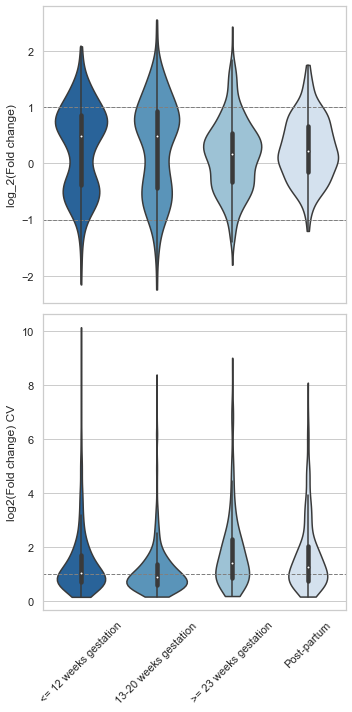

In [8]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize = (5, 10))

#Visualize logFC spread over time
ax[0].hlines([-1, 1], -1, 4, lw = 1, linestyle = 'dashed', color = 'gray')
sns.violinplot(x = 'variable', y = 'value', data = term_logFC_sig.logFC.loc[de_PE_sig_genes].melt(), 
               palette = 'Blues_r', inner = 'box', cut = 0, ax = ax[0])

ax[0].yaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax[0].set_xlabel("") 
ax[0].set_ylabel("log_2(Fold change)") #If use latex formatting to achieve subscripting, illustrator interprets text as pictures. So leave unformatted and format in illustrator for subscript

#Visualize 'coefficient of variation' = (delta_95CI / mean_logFC) over time. 
#For some genes, CV is huge. Really interested in those where CV around 1 so cutoff plot at 12
melted_CV = term_logFC_sig.CV.loc[de_PE_sig_genes].melt().dropna()
CV_plot_cutoff = 12

for time_pt in term_labels.values():
    print('%s: %d genes have CV greater than cutoff' % (time_pt, np.sum(melted_CV.loc[melted_CV.variable == time_pt, "value"] > CV_plot_cutoff)))

ax[1].hlines([1], -1, 4, lw = 1, linestyle = 'dashed', color = 'gray')
sns.violinplot(x = 'variable', y = 'value', inner = 'box', cut = 0, 
               data = melted_CV.loc[melted_CV.value <= CV_plot_cutoff], ax = ax[1], palette = 'Blues_r') 

ax[1].set_xlabel("")
ax[1].set_ylabel("log2(Fold change) CV")
ax[1].yaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
ax[1].set_xticklabels(term_labels.values(), rotation = 45)

fig.tight_layout()

save_figure_pdf(fig, 'out/de/viz/DEG_logFC_CV.pdf')

In [9]:
melted_logFC = term_logFC_sig.logFC.loc[de_PE_sig_genes].melt().dropna()
melted_logFC.variable = pd.Categorical(melted_logFC.variable, ordered = True, categories = term_labels.values())

for time_group, logFC in melted_logFC.groupby('variable'):
    #if time_group != 'Post-partum': #Viz above these are all bimodal. Well late gestation is less bimodal but still drawn out as opposed to dist centered around 0 PP
    print('%s has + distribution centered at %.2f and - distribution centered at %.2f' % (time_group, logFC.loc[logFC.value > 0].value.mean(), logFC.loc[logFC.value < 0].value.mean()))
    #else: #Viz above this is not bimodal
    #    print('%s has %.2f mean' % (time_group, logFC.value.mean()))

<= 12 weeks gestation has + distribution centered at 0.80 and - distribution centered at -0.59
13-20 weeks gestation has + distribution centered at 0.87 and - distribution centered at -0.65
>= 23 weeks gestation has + distribution centered at 0.56 and - distribution centered at -0.48
Post-partum has + distribution centered at 0.57 and - distribution centered at -0.36


In [10]:
melted_CV.variable = pd.Categorical(melted_CV.variable, ordered = True, categories = term_labels.values())
for time_group, cvs in melted_CV.groupby('variable'):
    frac_l_1 = (cvs.value < 1).sum() / cvs.shape[0]
    print('%s has %.2f CV < 1' % (time_group, frac_l_1))

<= 12 weeks gestation has 0.49 CV < 1
13-20 weeks gestation has 0.58 CV < 1
>= 23 weeks gestation has 0.31 CV < 1
Post-partum has 0.36 CV < 1


# PE specific DEG clustering
* See if these DEGs cluster PE vs normotensive at each time point

In [43]:
## Normalize data for plotting using zscore
#Get 1 sample per subj per time_group
samples_term = {term_labels[time_group] : 
                meta_term.drop_duplicates(subset = 'subject', keep = 'first').index.to_list() 
                for time_group, meta_term in all_data.meta.groupby('term')}

fitted_scaler = {}
zscores_by_term = {}
pe_sig_terms = {}

min_zscore = None
max_zscore = None

CV_cutoff_by_term = {time_group : 0.5 for time_group in term_labels.values()}
CV_cutoff_by_term['13-20 weeks gestation'] = 0.4 #At 0.5 - n_genes > n_samples

for time_group, samples in samples_term.items():
    
    #Zscore scale data
    logCPM_term = all_data.rnaseq.logCPM.loc[:, samples].T
    fitted_scaler[time_group] = StandardScaler().fit(logCPM_term)
    zscores_by_term[time_group] = preprocess_data(fitted_scaler[time_group], logCPM_term).T
    
    #Get genes that pass CV and logFC threshold 
    term_logFC_sig.mod_CV_mask(CV_cutoff_by_term[time_group])
    pe_sig_terms[time_group] = de_PE_sig_genes[np.logical_and(term_logFC_sig.CV_mask.loc[de_PE_sig_genes, time_group],
                                                              term_logFC_sig.logFC_mask.loc[de_PE_sig_genes, time_group]
                                                             )
                                              ]
    
    #Get min and max axs time groups for unified plotting
    curr_time_min_zscore = np.min(zscores_by_term[time_group].loc[pe_sig_terms[time_group], :].to_numpy().flatten())
    curr_time_max_zscore = np.max(zscores_by_term[time_group].loc[pe_sig_terms[time_group], :].to_numpy().flatten())
    
    min_zscore = curr_time_min_zscore if ((min_zscore is None) or (curr_time_min_zscore < min_zscore)) else min_zscore
    max_zscore = curr_time_max_zscore if ((max_zscore is None) or (curr_time_max_zscore > min_zscore)) else max_zscore

<= 12 weeks gestation: N DE genes used = 29, N samples = 49
13-20 weeks gestation: N DE genes used = 32, N samples = 49
>= 23 weeks gestation: N DE genes used = 30, N samples = 57
Post-partum: N DE genes used = 24, N samples = 46


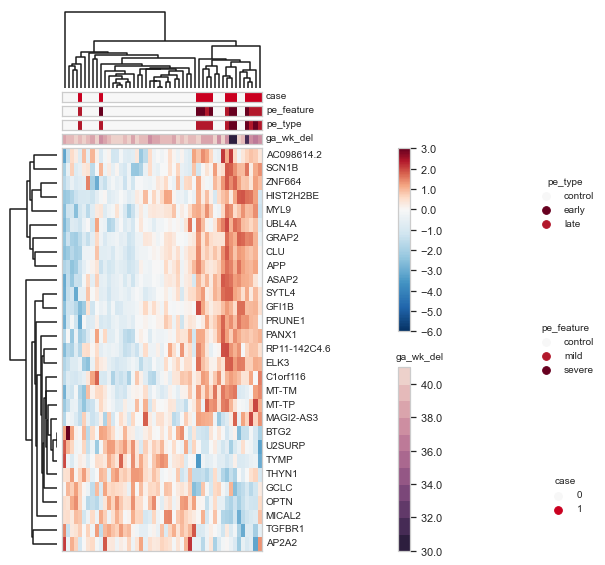

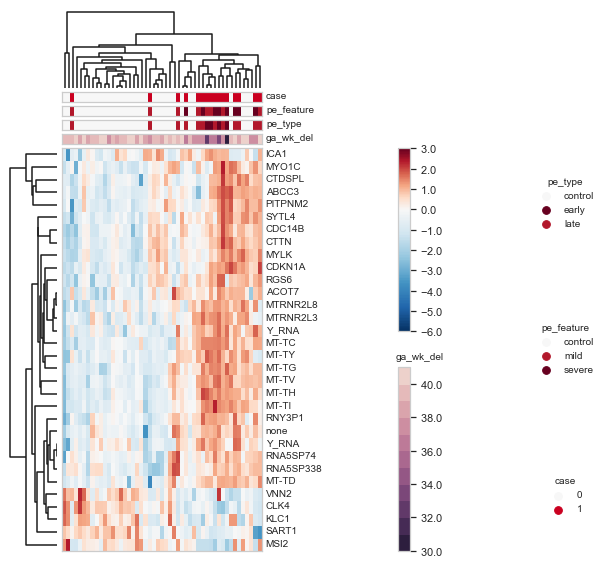

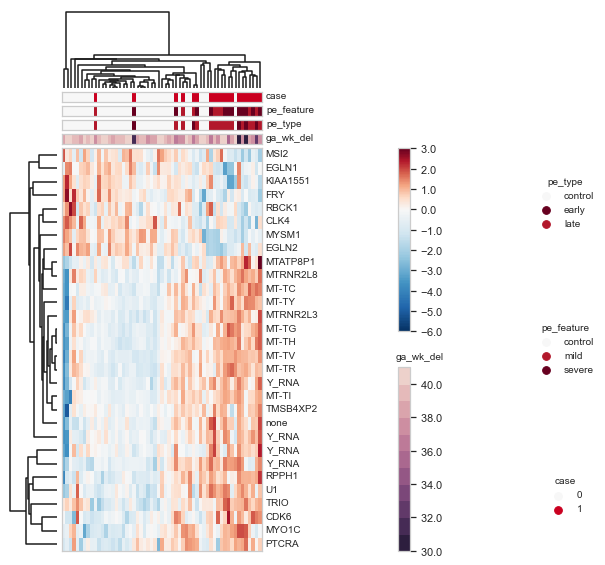

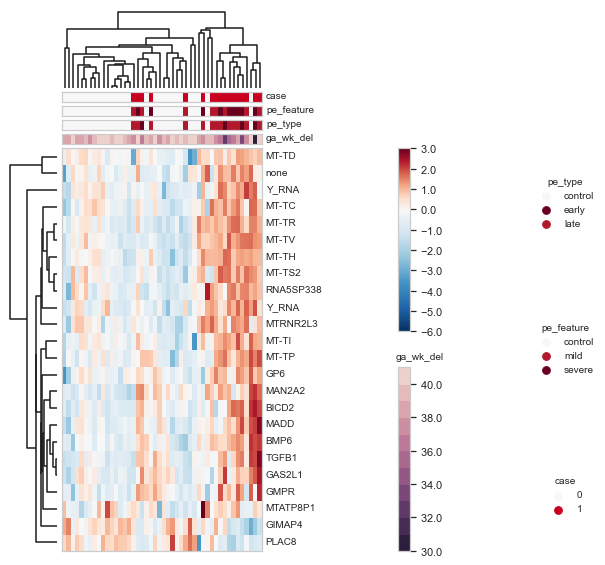

In [12]:
cmaps = {"case" : make_color_map("", ['#f7f7f7', '#ca0020']),
         "pe_feature" : make_color_map("", pe_feat_palette),
         "pe_type" : make_color_map("", pe_type_palette),
         "ga_wk_del" : make_color_map("", sns.cubehelix_palette(len(all_data.meta.ga_wk_del.unique()), reverse = True).as_hex())}

zscore_cbar_params = {'min' : np.floor(min_zscore), 'mid' : 0, 'max' : np.ceil(max_zscore)} #So that color bar is consistent across figures 
row_order = {}
for time_group, samples in samples_term.items():  
    meta_term = all_data.meta.loc[samples]
    meta_term.loc[:, 'case'] = meta_term.case.astype(str)

    zscores_to_plot = zscores_by_term[time_group].loc[pe_sig_terms[time_group], :].reset_index('gene_num', drop = True)
    print("%s: N DE genes used = %d, N samples = %s" % (time_group, zscores_to_plot.shape[0], meta_term.shape[0]))
    fig, plot, row_order[time_group] = nhm_plot_heatmap(zscores_to_plot, dfc = meta_term.loc[:, list(cmaps.keys())], cmaps = cmaps, center_args = zscore_cbar_params)

    save_figure_pdf(fig, 'out/de/viz/' + time_group.replace(" ", "_") + "_cluster.pdf")

In [13]:
n_samples_per_term_per_case = {time_group : all_data.meta.loc[samples].groupby('case').count().iloc[:, 0].to_numpy() for time_group, samples in samples_term.items()}
n_mistakes_hc = {'<= 12 weeks gestation' : [5, 2], '13-20 weeks gestation' : [7, 2], '>= 23 weeks gestation' : [1, 7], 'Post-partum' : [3, 5]} #[N Cntrl in PE, N PE in Cntrl]
confusion_matrices = {time_group : np.array([[n_samples_per_term_per_case[time_group][0] - n_mistakes_hc[time_group][0], n_mistakes_hc[time_group][0]], 
                                             [n_mistakes_hc[time_group][1], n_samples_per_term_per_case[time_group][1] - n_mistakes_hc[time_group][1]]]) for time_group in samples_term.keys()
                     }

for time_group, cm in confusion_matrices.items():
    print('%s, n = %d NT, %d PE' % (time_group, n_samples_per_term_per_case[time_group][0], n_samples_per_term_per_case[time_group][1]))
    get_hc_stats(time_group, cm)
    print()

<= 12 weeks gestation, n = 36 NT, 13 PE
<= 12 weeks gestation: Sensitivity = 85% [64-95%], Specificity = 86% [75-93%]

13-20 weeks gestation, n = 33 NT, 16 PE
13-20 weeks gestation: Sensitivity = 88% [69-96%], Specificity = 79% [66-88%]

>= 23 weeks gestation, n = 37 NT, 20 PE
>= 23 weeks gestation: Sensitivity = 65% [47-80%], Specificity = 97% [90-100%]

Post-partum, n = 29 NT, 17 PE
Post-partum: Sensitivity = 71% [51-86%], Specificity = 90% [78-96%]



In [14]:
#For supplement, table of genes included in each heatmap
full_DEG_heatmap_table = None 
for time_group, pe_sig in pe_sig_terms.items():
    curr_time_group = pd.DataFrame(data = {time_group: [time_group]}, index = pe_sig)
    full_DEG_heatmap_table = curr_time_group if full_DEG_heatmap_table is None else full_DEG_heatmap_table.join(curr_time_group, how = 'outer')

#Join columns
full_DEG_heatmap_table['Sample collection groups'] = full_DEG_heatmap_table[full_DEG_heatmap_table.columns].apply(
    lambda x: ', '.join(x.dropna().astype(str)), axis=1)

#Check size of overlap
n_terms_intersect = (~full_DEG_heatmap_table.iloc[:, :4].isnull()).sum(axis = 1) 
print('Across sample collection groups, %d DEGs detected pass thresholding at 2+ time points' % n_terms_intersect.loc[n_terms_intersect > 1].shape[0])

#Drop all columns except merged one, add annotation, and save
full_DEG_heatmap_table = full_DEG_heatmap_table.loc[:, 'Sample collection groups'].to_frame().join(all_data.rnaseq.anno)
full_DEG_heatmap_table.index.names = ['Gene', "ENSEMBL"]
full_DEG_heatmap_table.rename(columns = {'name' : 'Name', 'gene_type' : 'Type', 'summary' : 'Summary', 
                                         'GO_BP' : 'Biological process [GO]', 'GO_MF' : 'Molecular function [GO]'}, inplace = True)
full_DEG_heatmap_table.to_csv('out/de/w_mild_severe/DE_PEspecific_heatmap_genes_noColFormatting.csv')
full_DEG_heatmap_table#.head()

Across sample collection groups, 19 DEGs detected pass thresholding at 2+ time points


Sample collection groups  \
Gene       ENSEMBL                                                              
ABCC3      ENSG00000108846                              13-20 weeks gestation   
AC098614.2 ENSG00000213846                              <= 12 weeks gestation   
ACOT7      ENSG00000097021                              13-20 weeks gestation   
AP2A2      ENSG00000183020                              <= 12 weeks gestation   
APP        ENSG00000142192                              <= 12 weeks gestation   
...                                                                       ...   
Y_RNA      ENSG00000207061                                        Post-partum   
           ENSG00000238912                              >= 23 weeks gestation   
           ENSG00000252802                              >= 23 weeks gestation   
ZNF664     ENSG00000179195                              <= 12 weeks gestation   
none       ENSG00000281621  13-20 weeks gestation, >= 23 weeks gestation, ...   

                                                                         Name  \
Gene       ENSEMBL                                                              
ABCC3      ENSG00000108846          ATP binding cassette subfamily C member 3   
AC098614.2 ENSG00000213846                                                NaN   
ACOT7      ENSG00000097021                            acyl-CoA thioesterase 7   
AP2A2      ENSG00000183020  adaptor related protein complex 2 subunit alpha 2   
APP        ENSG00000142192                     amyloid beta precursor protein   
...                                                                       ...   
Y_RNA      ENSG00000207061                                              Y RNA   
           ENSG00000238912                                              Y RNA   
           ENSG00000252802                                              Y RNA   
ZNF664     ENSG00000179195                            zinc finger protein 664   
none       ENSG00000281621                                                NaN   

                                      Type  \
Gene       ENSEMBL                           
ABCC3      ENSG00000108846  protein_coding   
AC098614.2 ENSG00000213846             NaN   
ACOT7      ENSG00000097021  protein_coding   
AP2A2      ENSG00000183020  protein_coding   
APP        ENSG00000142192  protein_coding   
...                                    ...   
Y_RNA      ENSG00000207061        misc_RNA   
           ENSG00000238912        misc_RNA   
           ENSG00000252802        misc_RNA   
ZNF664     ENSG00000179195  protein_coding   
none       ENSG00000281621             NaN   

                                                                      Summary  \
Gene       ENSEMBL                                                              
ABCC3      ENSG00000108846  The protein encoded by this gene is a member o...   
AC098614.2 ENSG00000213846                                                NaN   
ACOT7      ENSG00000097021  This gene encodes a member of the acyl coenzym...   
AP2A2      ENSG00000183020  The protein encoded by this gene is a subunit ...   
APP        ENSG00000142192  This gene encodes a cell surface receptor and ...   
...                                                                       ...   
Y_RNA      ENSG00000207061                                                NaN   
           ENSG00000238912                                                NaN   
           ENSG00000252802                                                NaN   
ZNF664     ENSG00000179195                                                NaN   
none       ENSG00000281621                                                NaN   

                                                      Biological process [GO]  \
Gene       ENSEMBL                                                              
ABCC3      ENSG00000108846  xenobiotic transmembrane transport, transmembr...   
AC098614.2 ENSG00000213846                       

In [44]:
for time_group, pe_sig in pe_sig_terms.items():
    print(time_group)
    curr_time_group = pd.DataFrame(data = {time_group: [time_group]}, index = pe_sig)
    curr_time_group_anno = curr_time_group.join(all_data.rnaseq.anno)
    curr_time_group_anno.index.names = ['Gene', "ENSEMBL"]
    curr_time_group_anno.rename(columns = {'name' : 'Name', 'gene_type' : 'Type', 'summary' : 'Summary', 
                                    'GO_BP' : 'Biological process [GO]', 'GO_MF' : 'Molecular function [GO]'}, inplace = True)

    curr_time_group_anno.to_csv('out/de/w_mild_severe/tp_tables/' + time_group.replace(' ', '_') + '_heatmap_genes_noColFormatting.csv')

<= 12 weeks gestation
13-20 weeks gestation
>= 23 weeks gestation
Post-partum


N DE genes used = 29, N samples = 49
N DE genes used = 29, N samples = 57
N DE genes used = 29, N samples = 46
N DE genes used = 32, N samples = 49
N DE genes used = 32, N samples = 57
N DE genes used = 32, N samples = 46
N DE genes used = 30, N samples = 49
N DE genes used = 30, N samples = 49
N DE genes used = 30, N samples = 46
N DE genes used = 24, N samples = 49
N DE genes used = 24, N samples = 49
N DE genes used = 24, N samples = 57


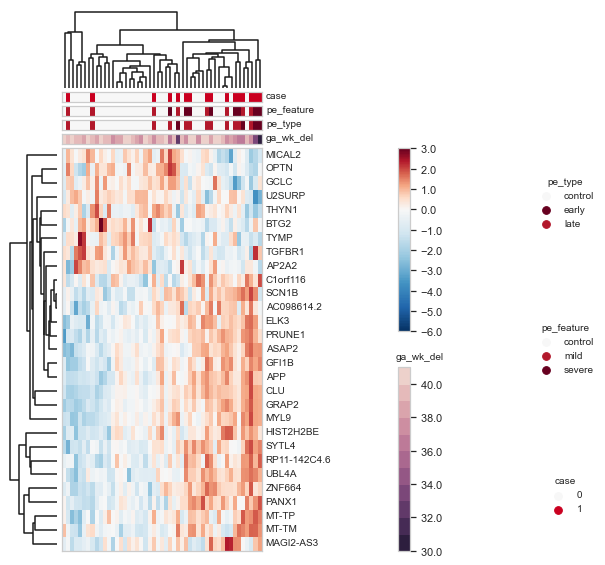

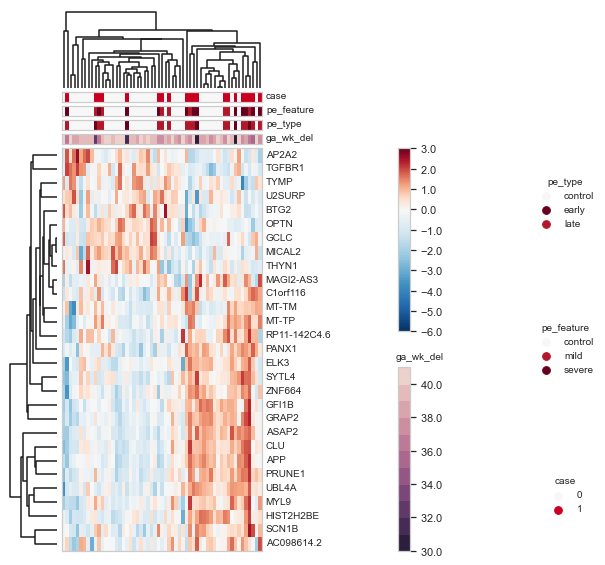

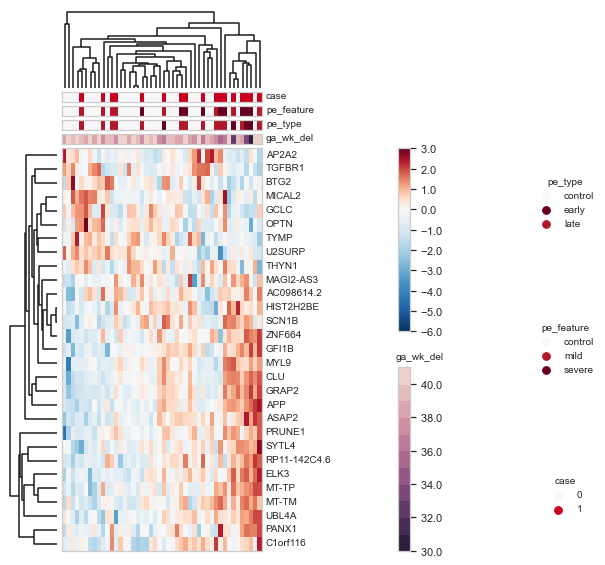

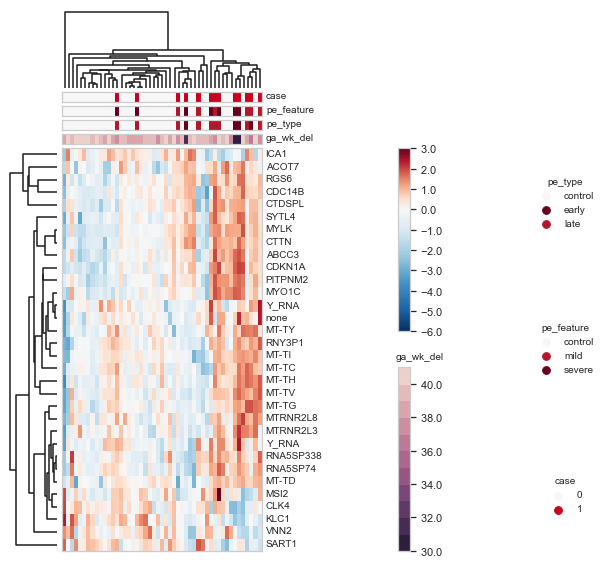

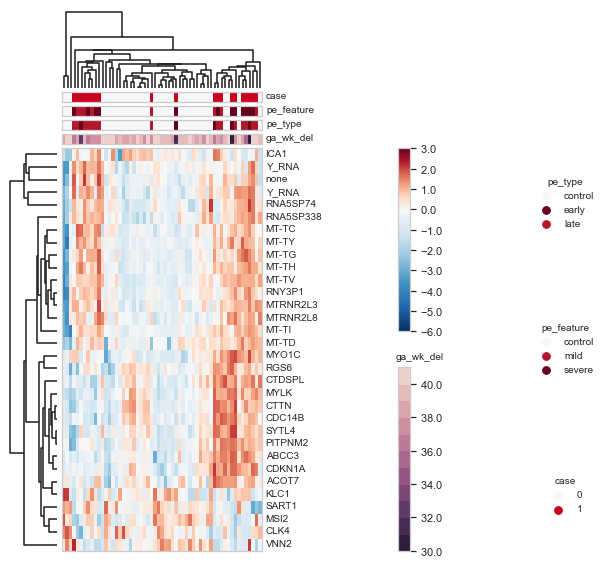

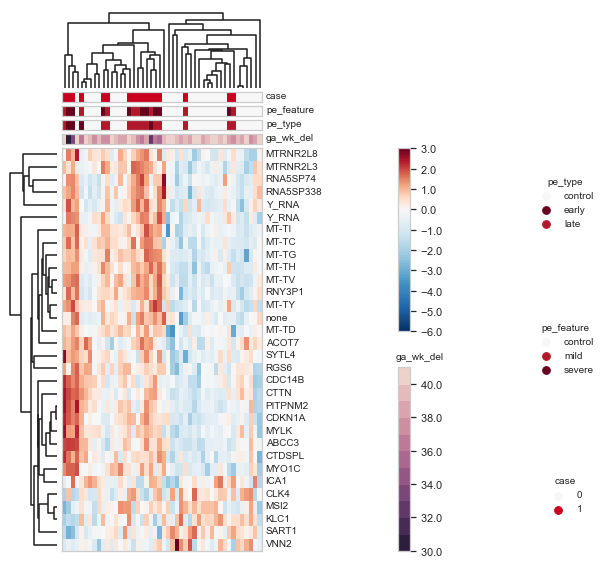

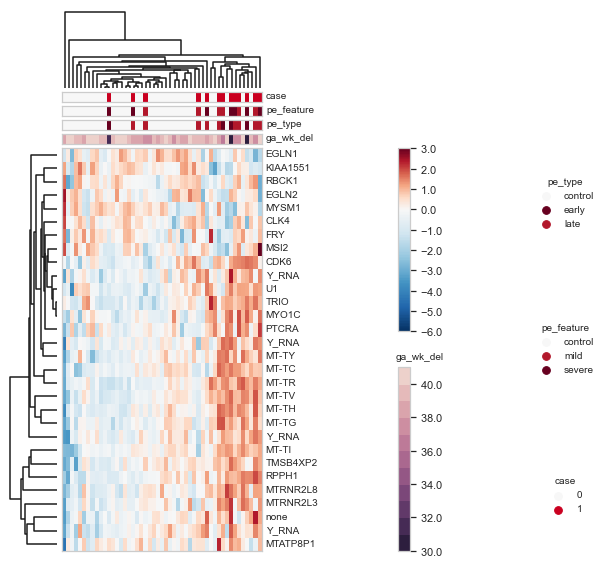

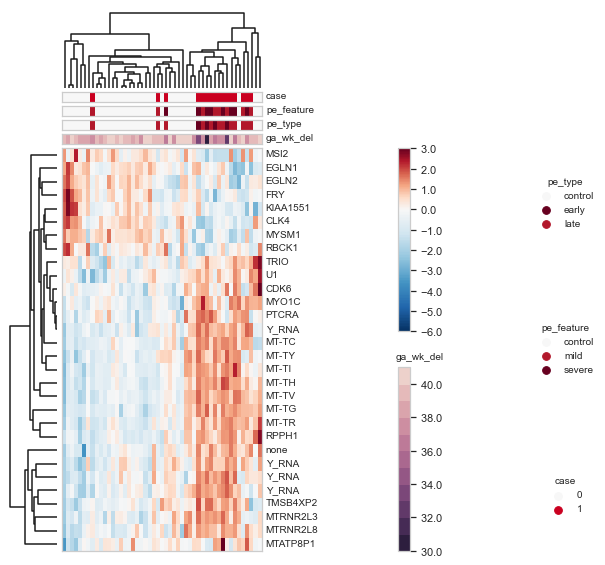

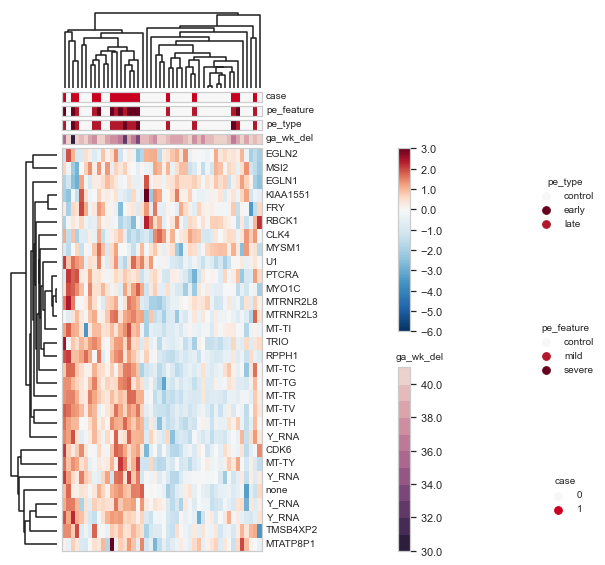

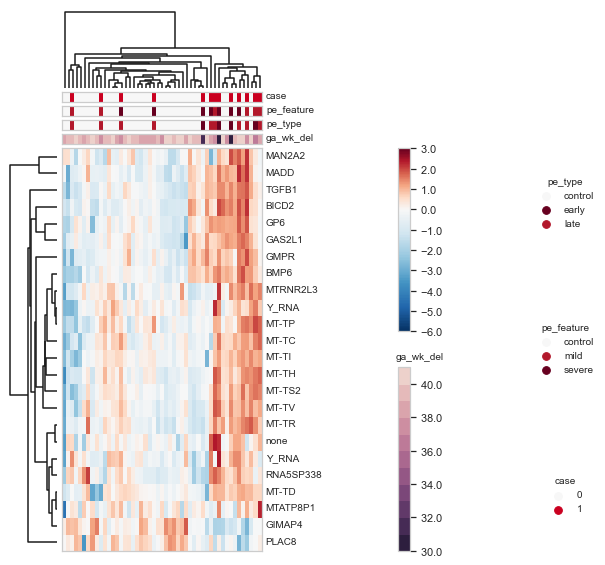

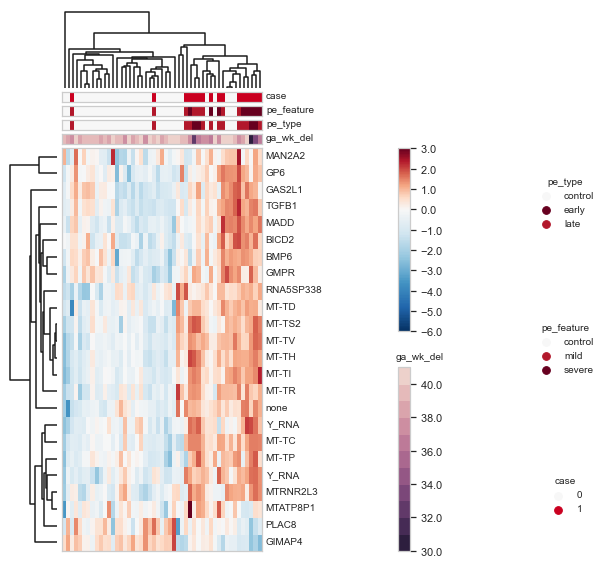

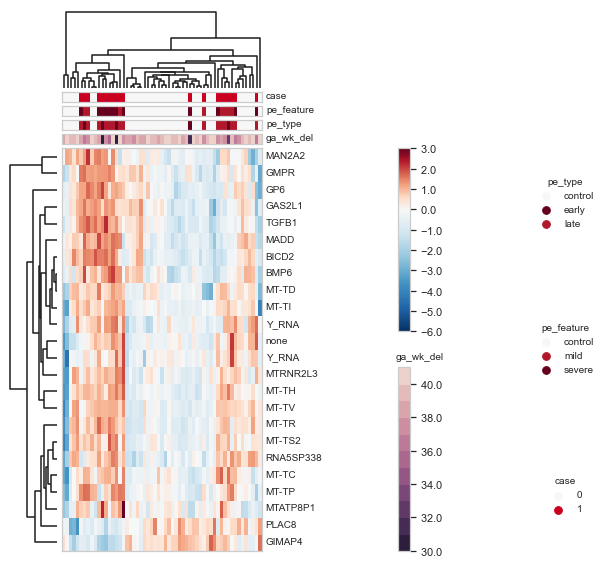

In [15]:
#For supplement
#See if genes from 1 term can cluster samples from other terms
for term in term_labels.values():
    for other_term, samples in samples_term.items(): 
        if other_term == term:
            continue
        
        meta_term = all_data.meta.loc[samples]
        meta_term.loc[:, 'case'] = meta_term.case.astype(str)
        
        zscores_to_plot = zscores_by_term[other_term].loc[pe_sig_terms[term], :].reset_index('gene_num', drop = True)
        print("N DE genes used = %d, N samples = %s" % (zscores_to_plot.shape[0], meta_term.shape[0]))
        fig, _, _ = nhm_plot_heatmap(zscores_to_plot, dfc = meta_term.loc[:, list(cmaps.keys())], cmaps = cmaps, center_args = zscore_cbar_params)
        save_figure_pdf(fig, 'out/de/viz/cross_cluster/' + term.replace(" ", "_") + "_DEGs_cluster_" + other_term.replace(" ", "_") + ".pdf")

# K-means cluster
* Understand time trends

Identified 2 clusters
N genes per cluster
1    216
2    328
Name: kmeans_cluster, dtype: int64
Percent features per cluster
1    0.4
2    0.6
Name: kmeans_cluster, dtype: float64


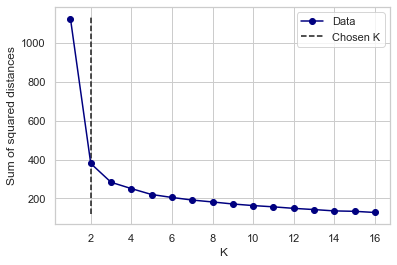

In [16]:
kmeans = kmeans_cluster(term_logFC_sig.logFC, n_max_clusters = 4**2, 
                        manually_choose_k=True, selected_k=2) #4 time points with 2 possibiliites at each (DE or not)
save_figure_pdf(kmeans['elbow_plot'], 'out/de/viz/DE_kmeans_nClusters_QC.pdf')

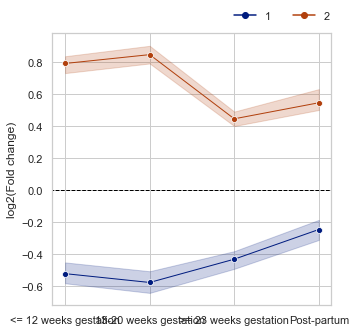

In [17]:
fig_kmeans, ax_kmeans = plot_lineplot(df = term_logFC_sig.logFC.join(kmeans['clusters']).melt(id_vars='kmeans_cluster', var_name = 'time', value_name = 'log2FC'), 
                                      x_name = 'time', y_name = 'log2FC', hue_name = 'kmeans_cluster', style_name = 'kmeans_cluster',
                                      markers = {cluster_i : 'o' for cluster_i in np.arange(1, kmeans['n_clusters'] + 1)}, 
                                      palette = 'dark', x_label = '', y_label = 'log2(Fold change)',
                                      include_hline = True, line_pos = 0, line_start = -1, line_end = 5)

h,l = ax_kmeans.get_legend_handles_labels()
plt.legend(h[1:], l[1:], ncol = kmeans['n_clusters'], frameon=0, bbox_to_anchor=(1.03, 1.12)) #[1, :] removes legend title
save_figure_pdf(fig_kmeans, 'out/de/viz/DE_kmeans_clusters.pdf')

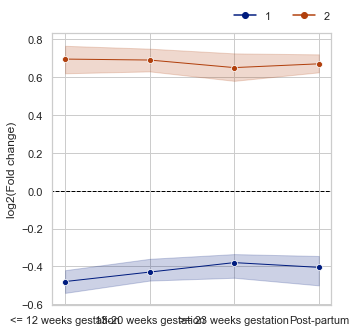

In [18]:
#Expect k-means to find non-flat lines. If data is permuted to disrupt corr across time between values for same gene, expect basically flat lines
permuted_kmeans = permute_and_kmeans(df = term_logFC_sig.logFC, 
                                     n_total_permutations = 1,
                                     n_max_clusters = 4**2, manually_choose_k = True, selected_k = 2)

#Plot permutation example
fig_kmeans_permuted, ax_kmeans_permuted = plot_lineplot(df = permuted_kmeans['permutation_ex'].join(permuted_kmeans['kmeans']['clusters']).melt(id_vars='kmeans_cluster', var_name = 'time', value_name = 'log2FC'), 
                                      x_name = 'time', y_name = 'log2FC', hue_name = 'kmeans_cluster', style_name = 'kmeans_cluster',
                                      markers = {cluster_i : 'o' for cluster_i in np.arange(1, permuted_kmeans['kmeans']['n_clusters'] + 1)}, 
                                      palette = 'dark', x_label = '', y_label = 'log2(Fold change)',
                                      include_hline = True, line_pos = 0, line_start = -1, line_end = 5)

h,l = ax_kmeans_permuted.get_legend_handles_labels()
plt.legend(h[1:], l[1:], ncol = 3, frameon=0, bbox_to_anchor=(1.03, 1.12)) #[1, :] removes legend title
save_figure_pdf(fig_kmeans_permuted, 'out/de/viz/DE_kmeans_clusters_PERMUTED.pdf')

# Cell Type and Tissue Analysis

In [19]:
tissue_sc_specific = pd.concat((read_tissue_spec_gini_csv("celltypes_for_mira_08052021/gini6_perCluster_kidney_12072020.csv", 'kidney'),
                                read_tissue_spec_gini_csv("celltypes_for_mira_08052021/gini6_perCluster_brain_NORMAL_01212021.csv", 'brain'),
                                read_tissue_spec_gini_csv("celltypes_for_mira_08052021/gini6_perCluster_heart_03152021.csv", 'heart'),
                                read_tissue_spec_gini_csv("celltypes_for_mira_08052021/gini6_perCluster_hepatocyte_12052020.csv", 'liver'),
                                read_tissue_spec_gini_csv("celltypes_for_mira_08052021/placenta_hpa_2/hemant_tiechmann_hpa_gini_.6_cutoff.csv", 'placenta')
                               ), 
                               axis = 0
                              )

refs = {'hpa' : read_ref_ds('../../data/tissue_cell_type_ref/hpa_gini_coefs.csv', '../../data/tissue_cell_type_ref/hpa_mean_expr.csv', gini_cutoff = 0.6, is_tsp = False),
        'tsp' : read_ref_ds('../../data/tissue_cell_type_ref/giniCoefs_cfRNA__pe_10082021.csv', '../../data/tissue_cell_type_ref/meanExpr_deg_cfRNA__pe_10082021.csv', gini_cutoff = 0.8, is_tsp = True),
       }

In [20]:
#Augment TSP with missing tissues (placenta, brain) and cell-types (eg cardiomyocyte in heart, proximal tubule in kidney)
refs['tsp_aug'] = tissue_sc_specific.join(refs['tsp'], rsuffix = '_tsp', how = 'outer')
is_na_aug = refs['tsp_aug'].loc[refs['tsp_aug'].isna().max_exp_in].index
refs['tsp_aug'].loc[is_na_aug, 'Gini'] = refs['tsp_aug'].loc[is_na_aug, 'Gini_tsp']
refs['tsp_aug'].loc[is_na_aug, 'max_exp_in'] = refs['tsp_aug'].loc[is_na_aug, 'max_exp_in_tsp']

refs.pop('tsp')
refs['tsp_aug']

,max_exp_in,Gini,organ,Gini_tsp,max_exp_in_tsp
gene_num,,,,,
ENSG00000000005,tendon cell,0.945030,NaN,0.945030,tendon cell
ENSG00000000971,hepatocytes,0.683309,liver,NaN,NaN
ENSG00000001626,pancreatic ductal cell,0.865027,NaN,0.865027,pancreatic ductal cell
ENSG00000002079,leucocyte,0.853290,NaN,0.853290,leucocyte
ENSG00000002586,pancreatic pp cell,0.833825,NaN,0.833825,pancreatic pp cell
...,...,...,...,...,...
ENSG00000286266,plasma cell,0.885701,NaN,0.885701,plasma cell
ENSG00000286267,intestinal tuft cell,0.988107,NaN,0.988107,intestinal tuft cell
ENSG00000286268,pancreatic delta cell,0.907942,NaN,0.907942,pancreatic delta cell


Index([], dtype='object')
Index([], dtype='object')


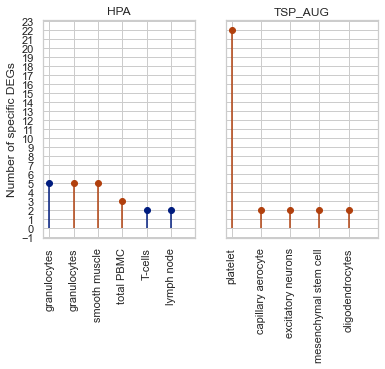

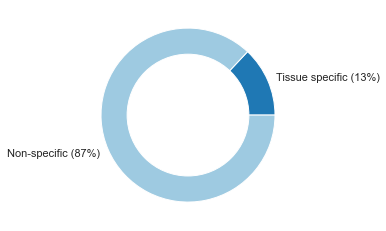

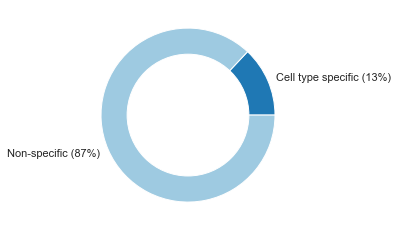

In [21]:
all_refs_DEG_enrichment = None
alpha = {'hpa' : 0.05, 'tsp_aug' : 0.05}
stemplot_fig, stemplot_ax = plt.subplots(1, len(alpha.keys()), sharey = True)

i = 0
for ref_name, ref_df in refs.items():
    deg_kmeans_isec, pct_isec, pct_non_specific = get_de_ref_kmeans_intersection_and_fracs(de_PE_mild.de.loc[de_PE_sig_genes, 'adj_pval'].to_frame(), ref_df, kmeans['clusters']).values()
    ref_specific_to = 'Tissue' if ref_name == 'hpa' else 'Cell type'
    
    donut_fig = plot_donut(fractions = [pct_isec, pct_non_specific], 
                           labels = ['%s specific (%d%%)' % (ref_specific_to, pct_isec), 
                                     'Non-specific (%d%%)' % (pct_non_specific)],
                          palette = discovery_validation_palette)
    
    ref_DEG_enrichment = test_DEGs_for_ref_enrichment(deg_kmeans_isec, ref_df, ref_specific_to, alpha = alpha[ref_name])
    all_refs_DEG_enrichment = ref_DEG_enrichment if all_refs_DEG_enrichment is None else pd.concat((all_refs_DEG_enrichment, ref_DEG_enrichment))
    
    stemplot_fig, _  = plot_stemplot_w_grouping(df = ref_DEG_enrichment.loc[ref_DEG_enrichment.is_sig].sort_values(by = 'n_DEG_specific_to_this', ascending=False).reset_index().reset_index(), 
                                                x_name = 'index', y_name = 'n_DEG_specific_to_this', 
                                                color_list = sns.color_palette(palette='dark', n_colors=kmeans['n_clusters']).as_hex(),
                                                group_name = 'kmeans_cluster', 
                                                xtick_name = 'specific_to', xlabel = '', 
                                                ylabel = 'Number of specific DEGs' if i == 0 else '',
                                                title = ref_name.upper(),
                                                fig = stemplot_fig, ax = stemplot_ax[i])

    i += 1
    
    save_figure_pdf(donut_fig, 'out/de/viz/' + ref_name + 'donut.pdf')
    
save_figure_pdf(stemplot_fig, 'out/de/viz/' + 'stemplots_all_to_mark_w_sig.pdf')

In [22]:
all_refs_DEG_enrichment

n_DEG_specific_to_this  \
kmeans_cluster specific_to                                           
1              T-cells                                           2   
               granulocytes                                      5   
               lymph node                                        2   
               placenta                                          2   
               thymus                                            3   
2              adipose tissue                                    2   
               cerebral cortex                                   6   
               corpus callosum                                   2   
               esophagus                                         2   
               granulocytes                                      5   
               liver                                             3   
               pancreas                                          2   
               small intestine                                   3   
               smooth muscle                                     5   
               spinal cord                                       2   
               testis                                            2   
               thymus                                            4   
               total PBMC                                        3   
               capillary aerocyte                                2   
               endothelial cell                                  2   
               excitatory neurons                                2   
               immature natural killer cell                      2   
               immune cell                                       2   
               intestinal tuft cell                              2   
               leucocyte                                         2   
               melanocyte                                        2   
               mesenchymal stem cell                             2   
               oligodendrocytes                                  2   
               platelet                                         22   

                                            n_genes_specific_to_this  \
kmeans_cluster specific_to                                             
1              T-cells                                            43   
               granulocytes                                      121   
               lymph node                                         26   
               placenta                                          184   
               thymus                                            193   
2              adipose tissue                                     55   
               cerebral cortex                                   463   
               corpus callosum                                    31   
               esophagus                                         117   
               granulocytes                                      121   
               liver                                             367   
               pancreas                                          128   
               small intestine                                   240   
               smooth muscle                                      39   
               spinal cord                                        39   
               testis                                            810   
               thymus                                            193   
               total PBMC                                         11   
               capillary aerocyte                                109   
               endothelial cell                                 1262   
               excitatory neurons                                 70   
               immature natural killer cell                      269   
               immune cell                                       215   
               intestinal tuft cell                              963   
 

In [23]:
all_refs_DEG_enrichment.query('is_sig')

n_DEG_specific_to_this  \
kmeans_cluster specific_to                                    
1              T-cells                                    2   
               granulocytes                               5   
               lymph node                                 2   
2              granulocytes                               5   
               smooth muscle                              5   
               total PBMC                                 3   
               capillary aerocyte                         2   
               excitatory neurons                         2   
               mesenchymal stem cell                      2   
               oligodendrocytes                           2   
               platelet                                  22   

                                     n_genes_specific_to_this  \
kmeans_cluster specific_to                                      
1              T-cells                                     43   
               granulocytes                               121   
               lymph node                                  26   
2              granulocytes                               121   
               smooth muscle                               39   
               total PBMC                                  11   
               capillary aerocyte                         109   
               excitatory neurons                          70   
               mesenchymal stem cell                       94   
               oligodendrocytes                            25   
               platelet                                   199   

                                     n_DEGs_specific_to_any_name_for_query  \
kmeans_cluster specific_to                                                   
1              T-cells                                                  17   
               granulocytes                                             17   
               lymph node                                               17   
2              granulocytes                                             52   
               smooth muscle                                            52   
               total PBMC                                               52   
               capillary aerocyte                                       64   
               excitatory neurons                                       64   
               mesenchymal stem cell                                    64   
               oligodendrocytes                                         64   
               platelet                                                 64   

                                            p_val  \
kmeans_cluster specific_to                          
1              T-cells                  0.0076717   
               granulocytes            2.4819e-05   
               lymph node              0.00284846   
2              granulocytes            0.00560932   
               smooth muscle          2.92774e-05   
               total PBMC              0.00012811   
               capillary aerocyte       0.0153093   
               excitatory neurons       0.0065574   
               mesenchymal stem cell    0.0115582   
               oligodendrocytes       0.000856249   
               platelet               2.22501e-34   

                                                                          DEGs_included  \
kmeans_cluster specific_to                                                                
1              T-cells                                                TBC1D10C,TRAF3IP3   
               granulocytes                                ICAM3,PTPN6,SNX20,VNN2,LIMD2   
               lymph node                                                    CYTIP,CD48   
2              granulocytes                            BIN2,GFI1B,ITGA2B,MTRNR2L12,NFE2   
               smooth muscle                                  MYL9,PTGS1,MYLK,SYNM,FLNA   
               total PBMC    

In [24]:
all_refs_DEG_enrichment.query('is_sig').reset_index().replace({'ref' : {'Tissue' : 'HPA', 
                                                        'Cell type' : 'TSP+'}, 
                                               'kmeans_cluster' : {1 : '1, Decreased in PE',
                                                                   2 : '2, Increased in PE'}}).sort_values(['kmeans_cluster','adj_pval']).set_index(['kmeans_cluster', 'specific_to']).loc[:, ['ref', 'adj_pval', 'DEGs_included']].to_csv('out/de/w_mild_severe/DEG_organ_ct_enrichment.csv')

# GO Analysis

In [25]:
#Get GO queries - 1 per kmeans cluster
go_queries = {str(cluster_i) : kmeans['clusters'].loc[kmeans['clusters'] == cluster_i].index.get_level_values('gene_num').to_list() for cluster_i in np.arange(1, kmeans['n_clusters'] + 1)}

In [26]:
sources_to_include = ['GO:BP', 'REAC', 'KEGG', 'GO:CC']
alpha = 0.05
go_table, go_table_pruned = get_and_prune_go_table(go_queries, 
                                                   choose_parent = False,
                                                   organism = 'hsapiens',
                                                   sources = sources_to_include, 
                                                   domain_scope = 'custom', 
                                                   no_evidences = False, 
                                                   no_iea = True,
                                                   user_threshold = alpha,
                                                   all_results = False,
                                                   background = all_data.rnaseq.logCPM.index.get_level_values('gene_num').to_list()
                                                  )

GO table has 33 terms
GO table has 10 terms after pruning


In [27]:
go_table

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences
27,GO:BP,GO:0016032,viral process,2.831883e-02,True,"""A multi-organism process in which a virus is ...",431,216,33,7144,0.152778,0.076566,1,[GO:0008150],"[ENSG00000178685, ENSG00000132109, ENSG0000017...","[[IMP, TAS], [IDA, IBA], [IMP], [IDA], [TAS], ..."
28,GO:BP,GO:0043122,regulation of I-kappaB kinase/NF-kappaB signaling,2.999501e-02,True,"""Any process that modulates I-kappaB kinase/NF...",136,216,17,7144,0.078704,0.125000,1,"[GO:0007249, GO:1902531]","[ENSG00000132109, ENSG00000104529, ENSG0000019...","[[IBA], [HMP], [IEP], [IMP, IEP], [IMP], [IMP,..."
23,REAC,REAC:R-HSA-156842,Eukaryotic Translation Elongation,1.343681e-02,True,Eukaryotic Translation Elongation,87,216,14,7144,0.064815,0.160920,1,[REAC:R-HSA-72766],"[ENSG00000156508, ENSG00000145425, ENSG0000019...","[[REAC], [REAC], [REAC], [REAC], [REAC], [REAC..."
0,GO:BP,GO:0002576,platelet degranulation,5.975916e-09,True,"""The regulated exocytosis of secretory granule...",76,325,23,7144,0.070769,0.302632,2,"[GO:0045055, GO:0051649]","[ENSG00000102362, ENSG00000158710, ENSG0000007...","[[TAS], [TAS], [TAS], [TAS], [TAS], [TAS], [TA..."
3,GO:BP,GO:0030168,platelet activation,9.952855e-08,True,"""A series of progressive, overlapping events t...",102,325,25,7144,0.076923,0.245098,2,"[GO:0001775, GO:0007596]","[ENSG00000169704, ENSG00000051382, ENSG0000010...","[[TAS], [TAS], [HMP], [IEP, ISO, IBA], [IDA], ..."
5,GO:BP,GO:0050817,coagulation,7.367316e-07,True,"""The process in which a fluid solution, or par...",179,325,32,7144,0.098462,0.178771,2,[GO:0032501],"[ENSG00000169704, ENSG00000051382, ENSG0000010...","[[TAS], [TAS], [HMP], [IEP, ISO, IBA], [IDA], ..."
6,GO:BP,GO:0007596,blood coagulation,7.367316e-07,True,"""The sequential process in which the multiple ...",179,325,32,7144,0.098462,0.178771,2,"[GO:0007599, GO:0042060, GO:0050817]","[ENSG00000169704, ENSG00000051382, ENSG0000010...","[[TAS], [TAS], [HMP], [IEP, ISO, IBA], [IDA], ..."
7,GO:BP,GO:0042060,wound healing,1.016152e-06,True,"""The series of events that restore integrity t...",236,325,37,7144,0.113846,0.156780,2,[GO:0009611],"[ENSG00000169704, ENSG00000051382, ENSG0000010...","[[TAS], [TAS], [HMP], [IDA, IMP], [IEP, ISO, I..."
8,GO:BP,GO:0007599,hemostasis,1.166678e-06,True,"""The stopping of bleeding (loss of body fluid)...",182,325,32,7144,0.098462,0.175824,2,[GO:0050878],"[ENSG00000169704, ENSG00000051382, ENSG0000010...","[[TAS], [TAS], [HMP], [IEP, ISO, IBA], [IDA], ..."
9,GO:BP,GO:0050878,regulation of body fluid levels,1.417270e-06,True,"""Any process that modulates the levels of body...",194,325,33,7144,0.101538,0.170103,2,[GO:0065008],"[ENSG00000169704, ENSG00000051382, ENSG0000010...","[[TAS], [TAS], [HMP], [IEP, ISO, IBA], [IDA], ..."


In [28]:
go_table.iloc[:, [2,1,0,3,5]+list(np.arange(10, go_table.shape[1]-1))].to_csv("out/de/DE_GOterms.csv", index = False)

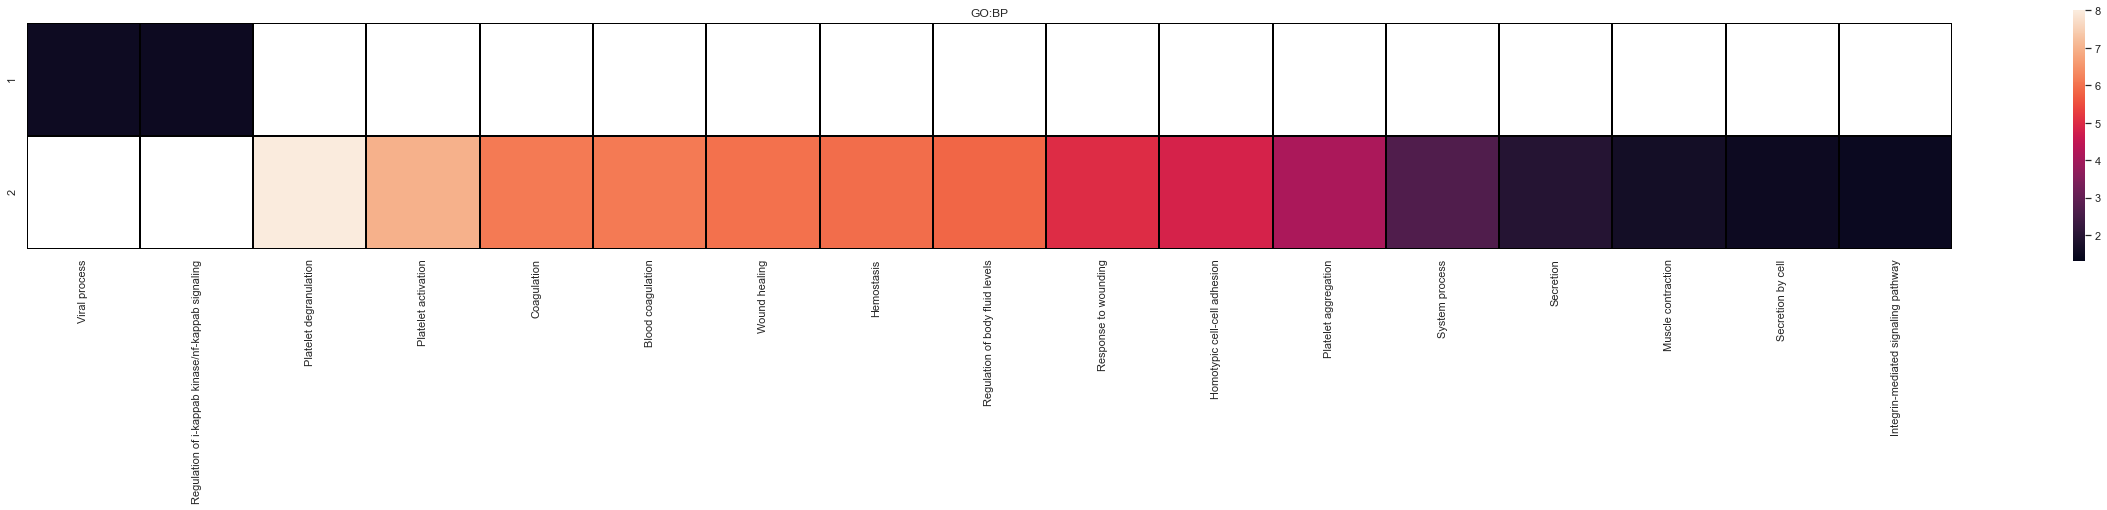

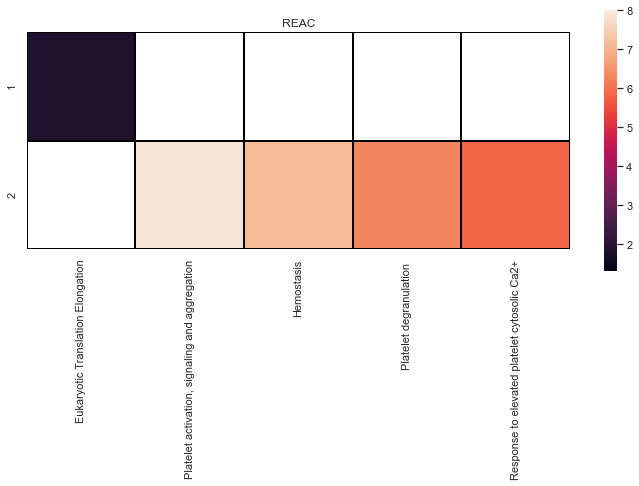

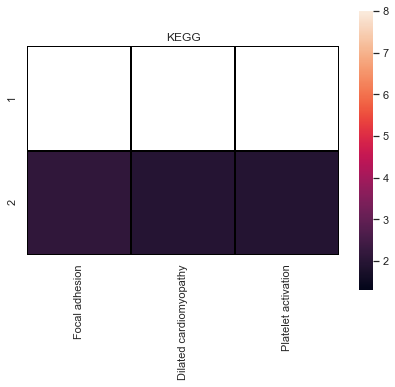

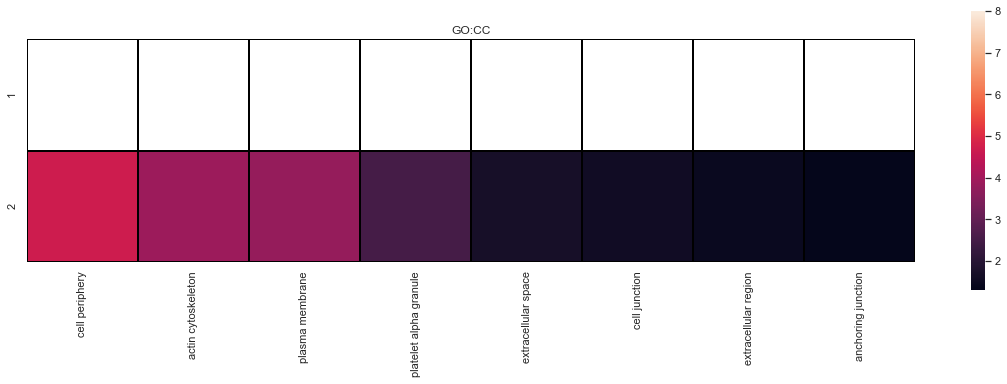

In [29]:
plot_colorbar = True

go_table_to_plot_og = go_table

for source in sources_to_include:
    if go_table_to_plot_og.loc[go_table_to_plot_og.source.isin([source])].shape[0] == 0:
        continue

    go_table_to_plot = -1*np.log10(go_table_to_plot_og.loc[go_table_to_plot_og.source.isin([source]), ['name', 'query', 'p_value']].pivot(index = 'query', columns = 'name', values = 'p_value')).fillna(0)
    go_table_to_plot = go_table_to_plot.loc[:, go_table_to_plot_og.loc[go_table_to_plot_og.source.isin([source])].name]
    go_table_to_plot= go_table_to_plot.loc[:, ~go_table_to_plot.columns.duplicated()]
    
    if source == 'GO:BP':
        go_table_to_plot.columns = go_table_to_plot.columns.str.capitalize()
        
    #Insert keys that did not have any sig GO terms
    for key in go_table_to_plot.index.categories:
        if key in go_table_to_plot.index:
            continue
        go_table_to_plot.loc[key, :] = 0
    go_table_to_plot.sort_index(inplace = True)

    fig, ax = plt.subplots(1, figsize = (go_table_to_plot.shape[1]*2, 10))
    sns.heatmap(go_table_to_plot, 
                mask = (go_table_to_plot == 0),
                square = True, xticklabels = True, yticklabels = True, linewidths = 1, cmap = 'rocket', linecolor = 'black',
                cbar_kws={"shrink": 0.4}, vmin = -1*np.log10(alpha), vmax = np.round(np.max(-1*np.log10(go_table_to_plot_og.p_value.to_numpy()))), 
                cbar = plot_colorbar, ax = ax)

    plt.title(source)
    plt.xlabel('')
    plt.ylabel('')

    fig.tight_layout()   
    save_figure_pdf(fig, "out/de/viz/" + source.replace(":", "-") + "_GO.pdf")

# Compare severe vs mild PE
* How do logFC [PE subtype vs control] compare between severe and mild PE

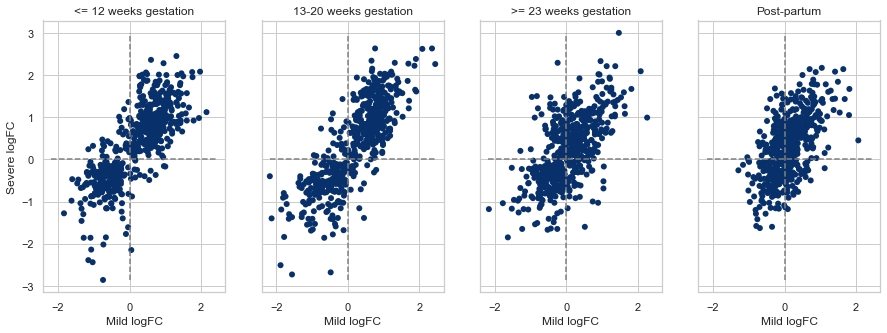

In [30]:
fig, comparison_stats = plot_and_compare_logFC(mild_logFC_sig.logFC, severe_logFC_sig.logFC, mild_logFC_sig.CV, 'Mild', 'Severe', term_labels)
save_figure_pdf(fig, 'out/de/viz/compare_disc_severe_mild_logFC.pdf')

In [31]:
#Slope of best fit line, on avg
#If slope < 1 - logFC(mild vs control) are larger than logFC(severe vs control)
#If slope = 1 - equivalent magnitude
#If slope > 1 - logFC(mild vs control) are smaller than logFC(severe vs control)
for key, val in comparison_stats.items():
    print('%s, best fit line slope = %.2f, intercept = %.2f' % (key, val['best_fit_line_coefs'][0], val['best_fit_line_coefs'][1]))

<= 12 weeks gestation, best fit line slope = 0.93, intercept = 0.21
PERMUTED <= 12 weeks gestation, best fit line slope = -0.04, intercept = 0.31
13-20 weeks gestation, best fit line slope = 1.03, intercept = 0.17
PERMUTED 13-20 weeks gestation, best fit line slope = 0.03, intercept = 0.28
>= 23 weeks gestation, best fit line slope = 0.77, intercept = 0.17
PERMUTED >= 23 weeks gestation, best fit line slope = -0.03, intercept = 0.15
Post-partum, best fit line slope = 0.86, intercept = 0.20
PERMUTED Post-partum, best fit line slope = -0.02, intercept = 0.21


# Intersection with known PE genes (dbPEC)
* Do the DEGs identified here significantly overlap with those in dbPEC?

In [32]:
dbPEC = pd.read_csv('../../data/dbPEC_resource/pe_all_genes.csv', index_col = 0)

dbPEC_obs_isec = dbPEC.index.intersection(de_PE_sig_genes.get_level_values('gene_name'))
dbPEC_obs_isec_size = dbPEC_obs_isec.shape[0]

dbPEC_null_dist = [dbPEC.index.intersection(pd.Series(all_data.rnaseq.anno.index.get_level_values('gene_name')).sample(n = de_PE_sig_genes.shape[0], replace = False, random_state = i)).shape[0] for i in np.arange(1000)]

print('Intersection size = %d with following genes: %s' % (dbPEC_obs_isec_size, ', '.join(dbPEC_obs_isec.to_list())))
print()
print('Is there sig overlap between dbPEC and DEGs by permutation test? P-val = %f' % permutation_test(dbPEC_obs_isec_size, np.array(dbPEC_null_dist)))
print('Is there sig overlap between dbPEC and DEGs by hypergeometric test? P-val = %f' % scipy.stats.hypergeom(M = all_data.rnaseq.logCPM.shape[0], 
                                                                                                               n = dbPEC.index.intersection(all_data.rnaseq.logCPM.index.get_level_values('gene_name')).shape[0],
                                                                                                               N = de_PE_sig_genes.shape[0]).sf((dbPEC_obs_isec_size - 1)))

Intersection size = 30 with following genes: CLU, ICAM3, TGFB1, IGF2, ADIPOR2, CDKN1A, GPX1, TGFBR1, RXRA, IFNGR2, JUN, PTGS1, F2R, NFKB1, GAPDH, SELP, NFKB2, ILK, GP9, ITGB3, CLDN5, ITGB1, ATP2A3, PDGFA, EGLN1, EGLN2, GP1BA, ACTB, VDR, CASP8

Is there sig overlap between dbPEC and DEGs by permutation test? P-val = 0.005990
Is there sig overlap between dbPEC and DEGs by hypergeometric test? P-val = 0.002495


# Save DEGs + logFC + CV

In [33]:
term_logFC_sig.logFC.join(term_logFC_sig.CV, lsuffix = " logFC", rsuffix = " CV").sort_values(['<= 12 weeks gestation CV', '13-20 weeks gestation CV', '>= 23 weeks gestation CV', 'Post-partum CV']).to_csv('out/de/w_mild_severe/DEG_logFC_CV.csv')